## Manually Set number of Confounding Variables

In [1]:
num_confound = 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from collections import defaultdict

In [3]:
combined_data = pd.read_csv('../data/intermediates/pre_acpca1.csv')
# pop = pd.read_csv('../data/raw/counties_05-08.csv').filter(['FIPS', 'POP_ESTIMATE_2018'])
# print(pop.head())
# combined_data = combined_data.merge(pop, left_on='FIPS', right_on='FIPS')
# combined_data.dropna()
# combined_data['normalized_deaths'] = np.true_divide(combined_data['Deaths'],combined_data['POP_ESTIMATE_2018'])
combined_data.set_index('FIPS', inplace=True)
print(combined_data.shape)
combined_data.head()

(210, 21)


,baseline,Rural-urban_Continuum Code_2013,Density per square mile of land area - Population,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,Unemployment_rate_2018,Med_HH_Income_Percent_of_State_Total_2018,Mar Temp AVG / F,Apr Temp AVG / F,May Temp AVG / F,...,Total_age65plus,Total households!!Average household size,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Nursery school preschool,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Kindergarten,SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!Elementary school (grades 1-8),SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!High school (grades 9-12),SCHOOL ENROLLMENT!!Population 3 years and over enrolled in school!!College or graduate school,HospCt,Deaths,normalized_deaths
FIPS,,,,,,,,,,,,,,,,,,,,,
1055.0,0.411541,0.333333,0.115692,0.361022,0.123984,0.135802,0.321642,0.697723,0.721448,0.778049,...,0.203494,0.325792,0.294336,0.358494,0.567540,0.362510,0.075155,0.258374,0.020576,0.119644
1081.0,0.260364,0.333333,0.137600,0.169329,0.457317,0.104938,0.390932,0.757764,0.743733,0.802439,...,0.056305,0.343891,0.586319,0.144048,0.571650,0.451833,0.609583,0.046170,0.082305,0.193068
1095.0,0.483091,0.666667,0.096738,0.476038,0.154472,0.092593,0.344739,0.672878,0.696379,0.768293,...,0.162744,0.334842,0.241579,0.364819,0.680389,0.659251,0.086210,0.278906,0.012346,0.100503
1097.0,0.419447,0.000000,0.202277,0.306709,0.229675,0.172840,0.299401,0.846791,0.813370,0.865854,...,0.145504,0.303167,0.505194,0.328976,0.607318,0.520245,0.119985,0.102618,0.144033,0.118461
1101.0,0.281413,0.000000,0.175569,0.325879,0.416667,0.129630,0.402908,0.792961,0.782730,0.848780,...,0.123487,0.271493,0.275549,0.385057,0.597948,0.570767,0.176654,0.159904,0.012346,0.036609


         PC1        PC2        PC3      PC4       PC5      PC6       PC7  \
0  31.107085  17.942453  14.746672  8.46109  4.604959  4.04213  3.471773   

        PC8     PC9      PC10      PC11      PC12      PC13    PC14      PC15  \
0  2.227264  2.0597  1.652841  1.529784  1.104463  1.027664  0.4953  0.463719   

       PC16     PC17        PC18  
0  0.290503  0.11357 -350.059343  
[31.10708451 17.94245287 14.74667168  8.4610897   4.60495896  4.04213007
  3.47177297  2.22726446  2.05970005]
18


<BarContainer object of 18 artists>

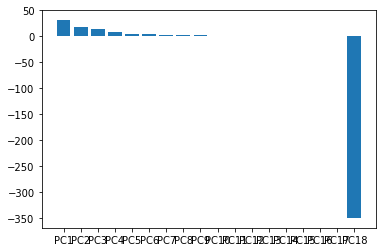

In [4]:
eigens = pd.read_csv('../data/intermediates/eigenvalues_ind.csv')
print(eigens.head())
eigs = eigens.to_numpy()
positive_eigs = eigs[eigs > 2]
print(positive_eigs)
# total_pcs = len(positive_eigs)
_, total_pcs = eigs.shape
print(total_pcs )
# print(eigens.loc[0,eigens.columns.values[0:]])
# labels = ['PC1', 'PC2', 'PC3', 'PC4']
plt.bar(eigens.columns.values[0:], eigens.loc[0,eigens.columns.values[0:]]) 

In [5]:
# eigen_d = pd.read_csv('../data/intermediates/eigenvalues_d.csv')
# print(eigen_d.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.285271  0.164558  0.135268  0.077364  0.042055  0.036913  0.031714   

       PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.02034  0.018826  0.015106  0.013971  0.010099  0.009389  0.004523   

       PC15      PC16      PC17      PC18  
0  0.004235  0.002654  0.001037  0.126678  


<BarContainer object of 18 artists>

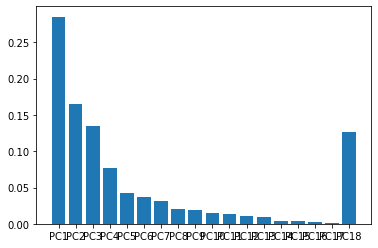

In [6]:
sigs = pd.read_csv('../data/intermediates/sigs_ind.csv')
print(sigs.head())
plt.bar(sigs.columns.values, sigs.loc[0,])

In [7]:
PCs = pd.read_csv('../data/intermediates/PCs_ind.csv')
PCs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
0,0.092054,-0.712211,0.400410,0.346658,-0.266957,0.253587,0.189541,-0.017700,-0.105416,0.107217,0.056780,0.016124,0.004655,0.029973,0.043488,0.009377,0.011112,0.053439
1,-0.121421,0.256000,-0.194872,-0.110895,-0.807428,0.080733,0.317501,0.047682,0.117623,0.057243,0.174012,0.042893,0.168734,0.030175,-0.004657,-0.028837,0.007974,0.168460
2,0.180794,-0.245727,-0.430427,-0.169922,0.095615,0.016955,0.201915,0.462222,-0.172473,0.011106,0.208860,0.357288,-0.211540,-0.366444,0.181746,0.109690,-0.026503,-0.054756
3,-0.277247,0.270948,0.060413,0.335646,0.051051,0.248307,0.212082,0.111933,-0.276033,-0.446360,-0.165638,-0.082022,-0.405557,-0.064815,0.105661,0.070589,0.015927,0.342008
4,0.026900,-0.168232,-0.164361,-0.179985,0.010017,0.083728,-0.034964,0.082089,-0.129451,-0.155710,-0.219249,-0.579454,0.457557,-0.218011,0.442822,-0.059370,-0.032694,0.118665


### Lambda=20

In [8]:
# acpca_data_ = pd.read_csv('../data/intermediates/post_acpca_d.csv')
# print(acpca_data_deaths.head())
# acpca_arr_deaths = acpca_data_deaths.to_numpy()
# acpca_arr_deaths

acpca_data_ind = pd.read_csv('../data/intermediates/post_acpca_ind.csv')
acpca_data_ind.head()
acpca_arr_ind = acpca_data_ind.to_numpy()
# acpca_arr_ind

In [9]:
acpca_data = pd.read_csv('../data/intermediates/post_acpca_ind.csv')
acpca_arr_ind = acpca_data.to_numpy()

In [10]:
# plt.plot(list(acpca_data_ind['PC1'].values), list(acpca_data_deaths['PC1'].values), 'bo')
# plt.xlabel('multi-variable PC')
# plt.ylabel('deaths PC')

In [11]:
# num_pcs = 14
# X = acpca_arr_ind[:,0:num_pcs]
# print(X.shape)
# Y = acpca_arr_deaths[:,0]
# print(Y.shape)
# reg = lm.LinearRegression().fit(X,Y)
# reg.score(X,Y)

In [12]:
# num_pcs = 1
# X = acpca_arr_ind[:,0:num_pcs]
# print(X.shape)
# Y = acpca_arr_deaths[:,0]
# print(Y.shape)
# reg = lm.LinearRegression().fit(X,Y)
# reg.score(X,Y)

## Regression on individual components

(210, 1)
(210,)
deaths corr score 0.0013343696221532753
mobility corr score 3.97579088600164e-05
(210, 1)
(210,)
deaths corr score 0.12100853956874791
mobility corr score 4.058219898273041e-05
(210, 1)
(210,)
deaths corr score 0.0006440032658072692
mobility corr score 4.197202777644904e-05
(210, 1)
(210,)
deaths corr score 0.004466092980256464
mobility corr score 1.193533949328529e-05
(210, 1)
(210,)
deaths corr score 0.0455455789187339
mobility corr score 8.073839381506076e-07
(210, 1)
(210,)
deaths corr score 0.0030052500201074306
mobility corr score 1.2215838796070244e-07
(210, 1)
(210,)
deaths corr score 0.00652588947636712
mobility corr score 2.9355916302264977e-06
(210, 1)
(210,)
deaths corr score 0.00048139075067255005
mobility corr score 6.47730481029285e-07
(210, 1)
(210,)
deaths corr score 0.005817600675239509
mobility corr score 8.749052055279094e-06
(210, 1)
(210,)
deaths corr score 0.002955518680472724
mobility corr score 7.711739616778068e-06
(210, 1)
(210,)
deaths corr s

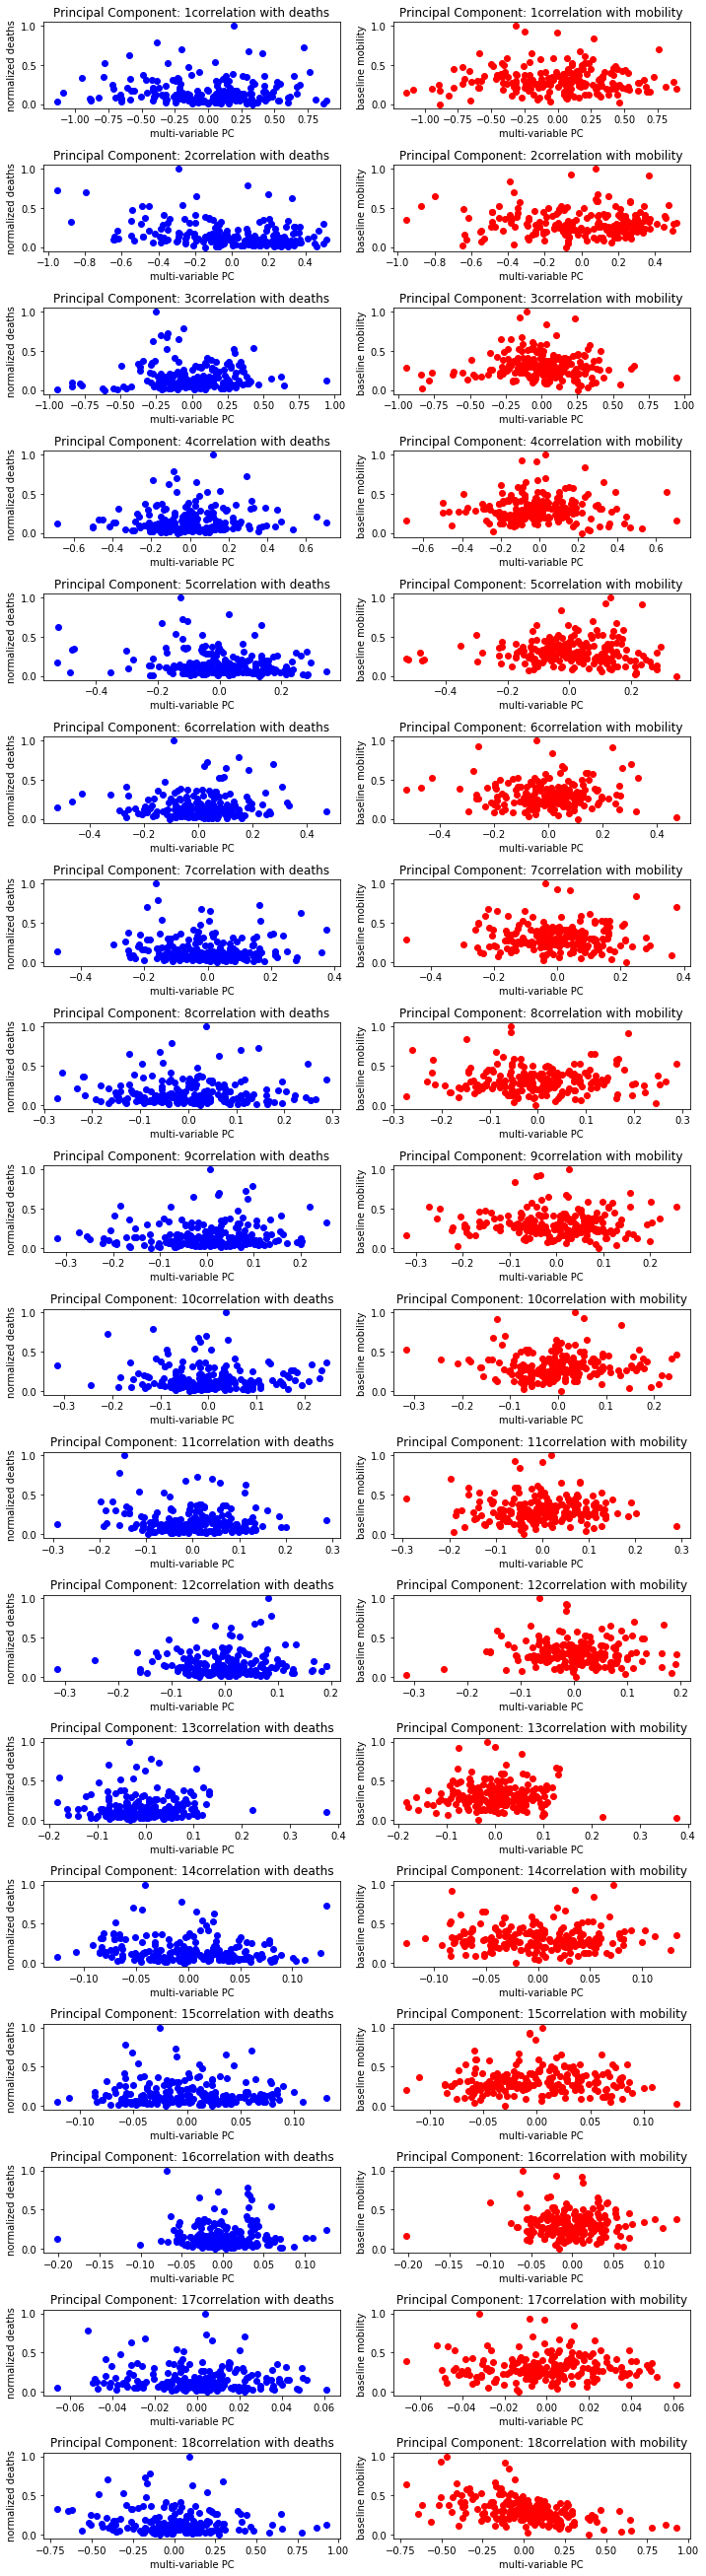

In [13]:
scores = {}
plt.figure(figsize=(10,40))

for pc in range(total_pcs): 
    X = acpca_arr_ind[:,pc]
    (r,) = X.shape
#     print(X.shape)
    X = X.reshape(r,1)
    print(X.shape)
    Y = combined_data['normalized_deaths']
    print(Y.shape)
    reg = lm.LinearRegression().fit(X,Y)
    score = reg.score(X,Y)
    
    print("deaths corr score", score)
    plt.subplot(20,2,2*pc+1)
    plt.tight_layout()
    plt.plot(X, Y, 'bo')
    plt.xlabel('multi-variable PC')
    plt.ylabel('normalized deaths')
    plt.title('Principal Component: ' + str(pc+1) + 'correlation with deaths')
    
    m = combined_data['baseline']
   
    reg_mob = lm.LinearRegression().fit(X,m)
    m_score = reg_mob.score(X,m)
    print('mobility corr score', m_score)
    plt.subplot(20,2,2*pc+2)
    plt.plot(X, m, 'ro')
    plt.xlabel('multi-variable PC')
    plt.ylabel('baseline mobility ')
    plt.title('Principal Component: ' + str(pc+1) + 'correlation with mobility')
    if m_score > score: 
        total_pcs = pc
        break 
    scores[pc] = score
# pc = 17    
# X = acpca_arr_ind[:,pc]
# (r,) = X.shape
# #     print(X.shape)
# X = X.reshape(r,1)
# print(X.shape)
# Y = combined_data['normalized_deaths']
# print(Y.shape)
# reg = lm.LinearRegression().fit(X,Y)
# score = reg.score(X,Y)
# scores[pc] = score
# print("deaths corr score", score)
# plt.subplot(20,2,2*pc+1)
# plt.tight_layout()
# plt.plot(X, Y, 'bo')
# plt.xlabel('multi-variable PC')
# plt.ylabel('normalized deaths')
# plt.title('Principal Component: ' + str(pc+1) + 'correlation with deaths')

# m = combined_data['baseline']
# reg_mob = lm.LinearRegression().fit(X,m)
# print('mobility corr score', reg_mob.score(X,m))
# plt.subplot(20,2,2*pc+2)
# plt.plot(X, m, 'ro')
# plt.xlabel('multi-variable PC')
# plt.ylabel('baseline mobility ')
# plt.title('Principal Component: ' + str(pc+1) + 'correlation with mobility')

## Sort PCs by regression scores

In [14]:
scores = {k: v for k, v in sorted(scores.items(), key=lambda item: -item[1])}
for pc, score in scores.items():
    print(pc, score)

1 0.12100853956874791
4 0.0455455789187339
13 0.02068267262971213
10 0.016776627038839642
6 0.00652588947636712
16 0.005924689770592462
8 0.005817600675239509
3 0.004466092980256464
5 0.0030052500201074306
9 0.002955518680472724
0 0.0013343696221532753
11 0.000668966813718086
2 0.0006440032658072692
14 0.000605115780879184
7 0.00048139075067255005
15 0.000386123096133395
12 0.00014075484518405457


## Regression on multiple compnents

PCs: [2]
0.12100853956874791
[-0.18485647] 


PCs: [2 5]
0.16646384127635971
[-0.18478753 -0.22411302] 


PCs: [ 2  5 14]
0.18716605718473422
[-0.18480128 -0.22411684 -0.46118885] 


PCs: [ 2  5 14 11]
0.2039913703740175
[-0.18483609 -0.22412651 -0.46118014 -0.23657018] 


PCs: [ 2  5 14 11  7]
0.21045057615663787
[-0.18478655 -0.22411275 -0.46119254 -0.23659    -0.09728653] 


PCs: [ 2  5 14 11  7 17]
0.21632689222308285
[-0.18475265 -0.22410333 -0.46120102 -0.23660356 -0.09726584 -0.51308774] 


PCs: [ 2  5 14 11  7 17  9]
0.22226520081649148
[-0.18483461 -0.22412611 -0.46118051 -0.23657077 -0.09731586 -0.51328618
  0.12106946] 


PCs: [ 2  5 14 11  7 17  9  4]
0.22684376039004597
[-0.1849186  -0.22414944 -0.46115948 -0.23653716 -0.09736711 -0.5134895
  0.12095456  0.05244251] 


PCs: [ 2  5 14 11  7 17  9  4  6]
0.22984069038862745
[-0.18491174 -0.22414753 -0.4611612  -0.23653991 -0.09736292 -0.51347288
  0.12096395  0.05244793  0.06142379] 


PCs: [ 2  5 14 11  7 17  9  4  6 10]
0.

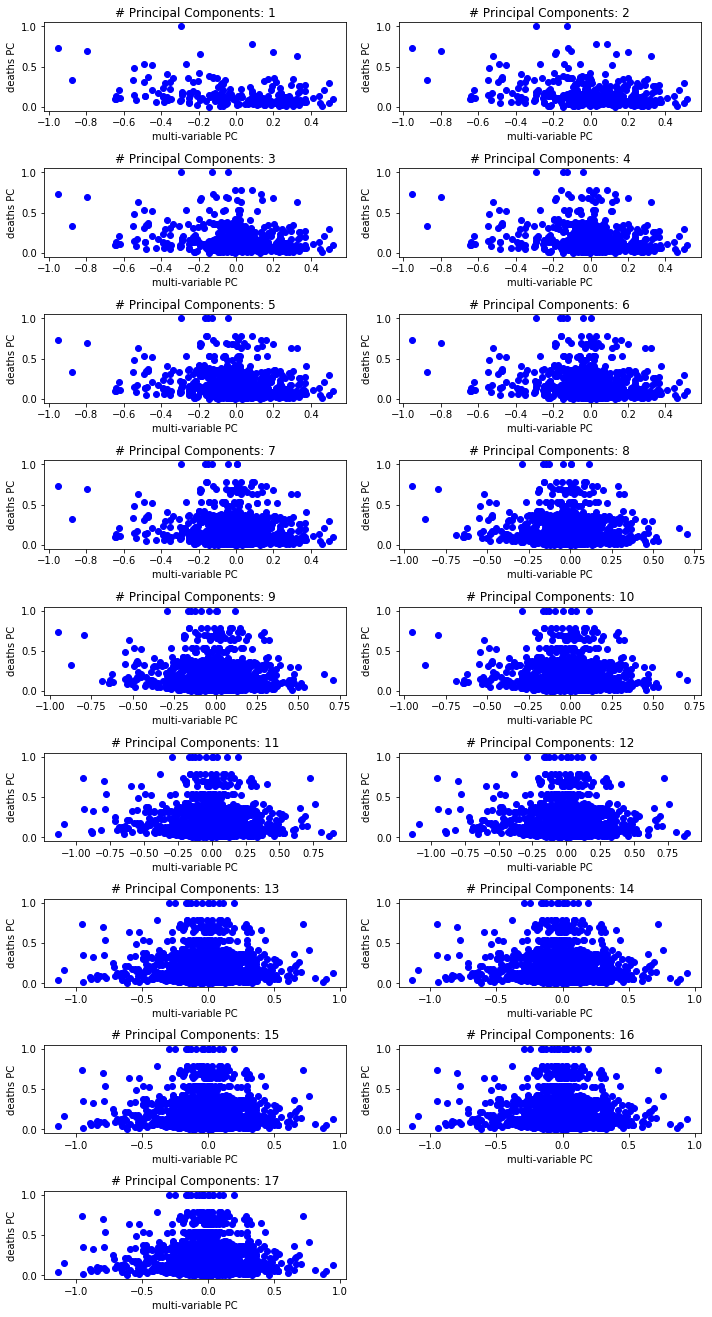

In [15]:
# Get list of PCs that are most correlated with # deaths
# Add PCs to LR model one by one in order of highest to lowest regression scores
Y = combined_data['normalized_deaths']
plt.figure(figsize=(10,20))
# num_pcs = 5

for num_pcs in range(1, total_pcs+1): 
    inds_pcs = list(scores.keys())[:num_pcs] # indices of top num_pcs most correlated PCs
    print('PCs:', np.array(inds_pcs)+1)
    X = acpca_arr_ind[:,inds_pcs]
#     print(X.shape)
#     Y = combined_data['Deaths']
#     print(Y.shape)
    reg = lm.LinearRegression().fit(X,Y)
    score = reg.score(X,Y)
    print(score)
    print(reg.coef_, '\n\n')
    plt.subplot(10,2,num_pcs)
    plt.tight_layout()
    plt.plot(X, Y, 'bo')
    plt.xlabel('multi-variable PC')
    plt.ylabel('deaths PC')
    plt.title('# Principal Components: ' + str(num_pcs))
    

## Assign coefficients of LR model to PCs

In [16]:
inds_pcs = list(scores.keys())[:total_pcs] # indices of top num_pcs most correlated PCs
print('PCs:', np.array(inds_pcs)+1)
X = acpca_arr_ind[:,inds_pcs]
#     print(X.shape)
# Y = combined_data['Deaths']
Y = combined_data['normalized_deaths']
#     print(Y.shape)
reg = lm.LinearRegression().fit(X,Y)
score = reg.score(X,Y)
print(score)
print(reg.coef_, '\n\n')
coeffs = {}
for i in range(len(inds_pcs)): 
    coeffs[inds_pcs[i]] = reg.coef_[i]
    print(inds_pcs[i]+1, reg.coef_[i])

PCs: [ 2  5 14 11  7 17  9  4  6 10  1 12  3 15  8 16 13]
0.23699718938678382
[-0.18485977 -0.22413309 -0.46117421 -0.2365607  -0.09733121 -0.51334707
  0.12103505  0.05248891  0.0614178  -0.09428666 -0.01420637  0.05734645
  0.01583556 -0.08103457 -0.03287994 -0.08028494  0.02753561] 


2 -0.18485976698081674
5 -0.22413309319510027
14 -0.4611742094602373
11 -0.2365607033718032
7 -0.09733120597403429
17 -0.5133470699966705
9 0.12103505264829498
4 0.05248890638583389
6 0.06141779711212773
10 -0.09428665635773878
1 -0.014206372191976282
12 0.05734644547145932
3 0.015835556506031922
15 -0.08103457481319855
8 -0.03287994164060528
16 -0.08028494496561495
13 0.027535614613640298


## Print PCs in order of regression scores
#### print values in PCs in order of highest to lowest absolute value of loadings 
#### For each variable, calculate a sum of the product of the weights in each PC multiplied by the coefficient corresponding to the PC 

In [17]:
weights = {}
r,c = PCs.shape
for j in range(total_pcs): 
    pc = list(scores.keys())[j] + 1
    eig = eigens.loc[0, 'PC' + str(pc)]
    if eig < 0: 
        continue
    print('Principal Component', str(pc))
    print('eigenvalue: ', eig)
    PC_dict = {}
    # PC9 = [-0.190896056547888, 0.468236937317933,-0.228567222005448,0.408002822993487,0.0535105125245226,0.407238079363182,0.181820228133276,0.366604933989350,0.435246581102968]
    for i in range(r): 
    #     print('{0:<80} \t {1:>0.3f}'.format(combined_data.columns.values[i+2], PC9[i]))
        loading = PCs.loc[i,'PC' + str(pc)] # weight of variable in component
        variable = combined_data.columns.values[i+num_confound] # variable name in column headers 
        PC_dict[variable] = loading
        coef = coeffs[pc-1] # coefficient corresponding to PC
        if variable not in weights:
            weights[variable] = 0
        weights[variable] += coef * loading
    PC_dict = {k: v for k, v in sorted(PC_dict.items(), key=lambda item: -abs(item[1]))}
    for k, v in PC_dict.items():
        print('{0:<100} \t {1:>0.3f}'.format(k, v))
    print('\n\n\n')

Principal Component 2
eigenvalue:  17.942452874063
Rural-urban_Continuum Code_2013                                                                      	 -0.712
Med_HH_Income_Percent_of_State_Total_2018                                                            	 0.379
Percent of adults with a bachelor's degree or higher 2014-18                                         	 0.271
Density per square mile of land area - Population                                                    	 0.256
Percent of adults with less than a high school diploma 2014-18                                       	 -0.246
HospCt                                                                                               	 -0.170
Unemployment_rate_2018                                                                               	 -0.168
Apr Temp AVG / F                                                                                     	 -0.162
Mar Temp AVG / F                                                        

In [18]:
for var, weight in weights.items():
    print('{0:<100} & {1:>0.4f} \\\\ \hline'.format(var.replace('_', '\\_'), weight))

Rural-urban\_Continuum Code\_2013                                                                    & 0.1534 \\ \hline
Density per square mile of land area - Population                                                    & 0.0584 \\ \hline
Percent of adults with less than a high school diploma 2014-18                                       & 0.0743 \\ \hline
Percent of adults with a bachelor's degree or higher 2014-18                                         & -0.0086 \\ \hline
Unemployment\_rate\_2018                                                                             & 0.1387 \\ \hline
Med\_HH\_Income\_Percent\_of\_State\_Total\_2018                                                     & -0.0422 \\ \hline
Mar Temp AVG / F                                                                                     & -0.2006 \\ \hline
Apr Temp AVG / F                                                                                     & 0.5024 \\ \hline
May Temp AVG / F                     

In [19]:
# plt.figure(figsize=(10,20))
# for num_pcs in range(14): 
#     X = acpca_arr_ind[:,0:num_pcs+1]
# #     print(X.shape)
#     Y = combined_data['Deaths']
# #     print(Y.shape)
#     reg = lm.LinearRegression().fit(X,Y)
#     score = reg.score(X,Y)
#     print(score)
#     plt.subplot(7,2,num_pcs+1)
#     plt.tight_layout()
#     plt.plot(X, Y, 'bo')
#     plt.xlabel('multi-variable PC')
#     plt.ylabel('deaths PC')
#     plt.title('# Principal Components: ' + str(num_pcs+1))

In [20]:
# plt.figure(figsize=(10,20))
# for num_pcs in range(14): 
#     X = np.abs(acpca_arr_ind[:,0:num_pcs+1])
# #     print(X.shape)
#     Y = combined_data['Deaths']
# #     print(Y.shape)
#     reg = lm.LinearRegression().fit(X,Y)
#     score = reg.score(X,Y)
#     print(score)
#     plt.subplot(7,2,num_pcs+1)
#     plt.tight_layout()
#     plt.plot(X, Y, 'bo')
#     plt.xlabel('multi-variable PC')
#     plt.ylabel('deaths PC')
#     plt.title('# Principal Component: ' + str(pc+1))